## Predicting Heart disease using machine learning 
This notbook looks into using various python-base machine learning and data science librarys in an attempt to build a machine learning model capable of predicting whether or not some one hase heart disease based on there medical attributes

*We'r going to take following applroch*
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimantation

### 1. Problem Definition
In a statement,

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

### 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

### 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

### 4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years

2. sex - (1 = male; 0 = female)

3. cp - chest pain type
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

5. chol - serum cholestoral in mg/dl
    - serum = LDL + HDL + .2 * triglycerides
    - above 200 is cause for concern

6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - '>126' mg/dL signals diabetes

7. restecg - resting electrocardiographic results   
    - 0: Nothing to note
    - 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    - 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber

8. thalach - maximum heart rate achieved

9. exang - exercise induced angina (1 = yes; 0 = no)

10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

11. slope - the slope of the peak exercise ST segment
    - 0: Upsloping: better heart rate with excercise (uncommon)
    - 1: Flatsloping: minimal change (typical healthy heart)
    - 2: Downslopins: signs of unhealthy heart

12. ca - number of major vessels (0-3) colored by flourosopy
    - colored vessel means the doctor can see the blood passing through
    - the more blood movement the better (no clots)

13. thal - thalium stress result
    - 1,3: normal
    - 6: fixed defect: used to be defect but ok now
    - 7: reversable defect: no proper blood movement when excercising
    
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

#### Prepering the Data
We're going to use pandas, matplotlib, and NumPy for data analysis and manipulation.

In [158]:
# import all the tools we need 

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notbook
%matplotlib inline  

# models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluvations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

#### Load Data

In [69]:
df = pd.read_csv("Data/heart-disease.csv")
df.shape

(303, 14)

### Data Exploration (exploratory data analysis or EDA)

The Goal here is to find out more about the data and become subject matter expert on the Dataset you are working with 
1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [70]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [71]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [72]:
# let's find out how many of each class there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

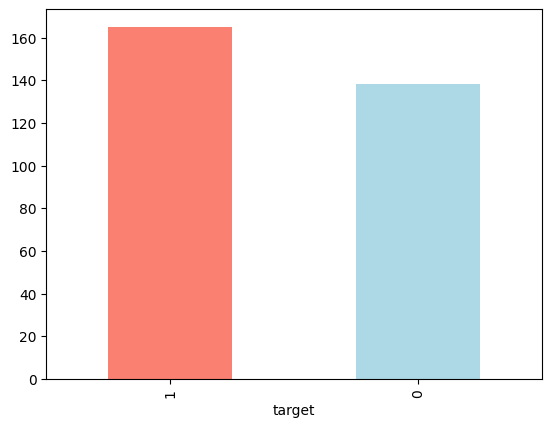

In [73]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [75]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [76]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### **Heart disease Frequency accordin to sex**

In [77]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [78]:
# compire target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


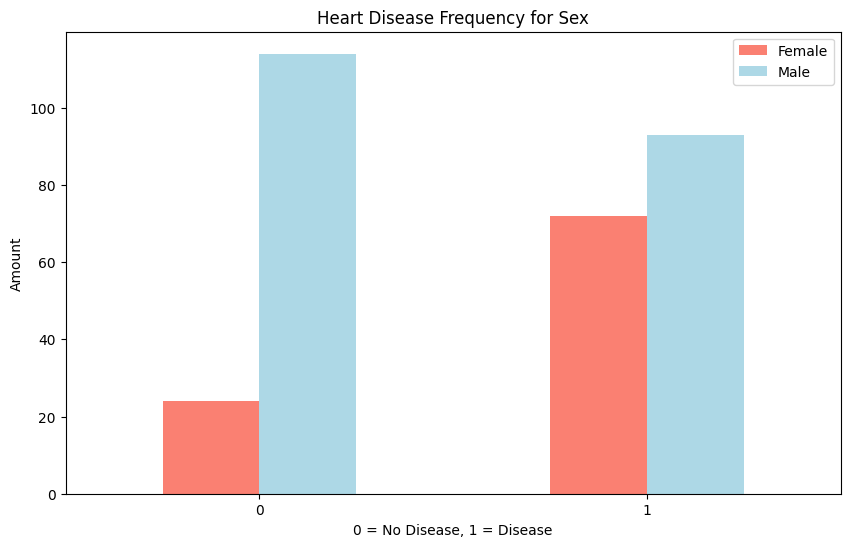

In [79]:
# create a pot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"]);

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

#### Age VS. MAX heart rate for heart disease

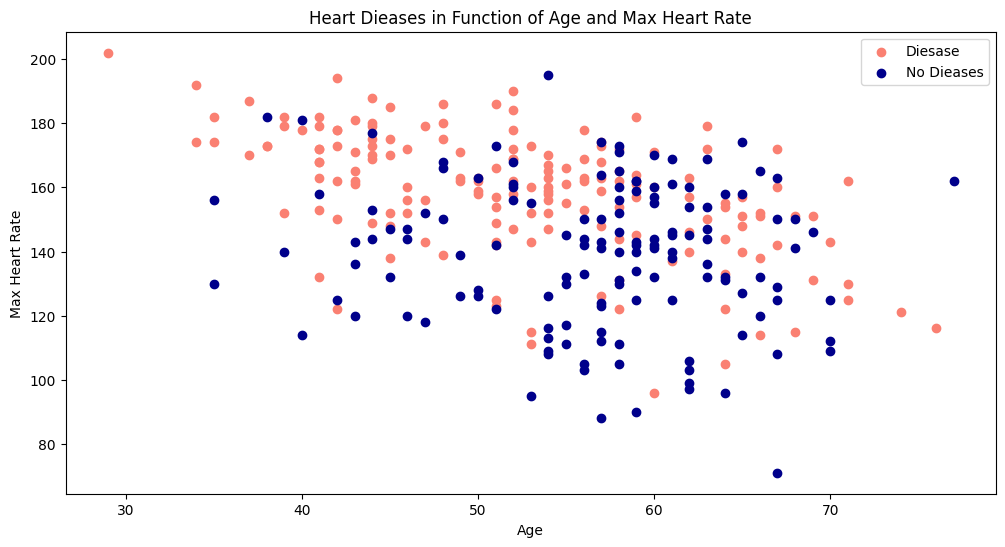

In [80]:
# create a figer 
plt.figure(figsize=(12, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color = "salmon");

# scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            color = "darkblue");

# add some helpful informations
plt.title("Heart Dieases in Function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Diesase", "No Dieases"]);

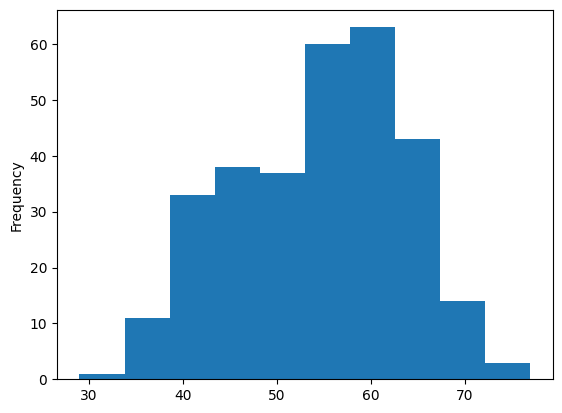

In [81]:
# check the distribution of age column with histograme
df.age.plot.hist();

#### Heart Disease Frequency per Chast pain Type 
3. cp - chest pain type
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease

In [82]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


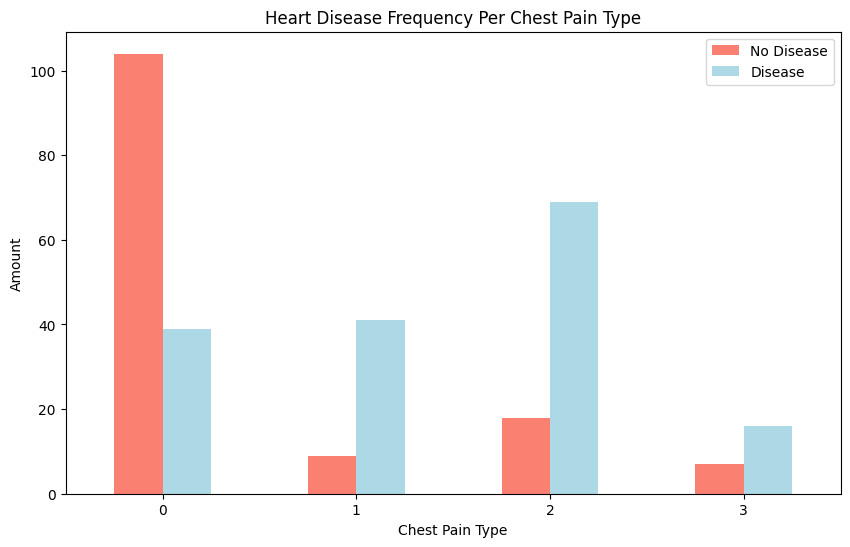

In [83]:
# Make the crosstab more vishual 
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication 
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [84]:
# Make correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


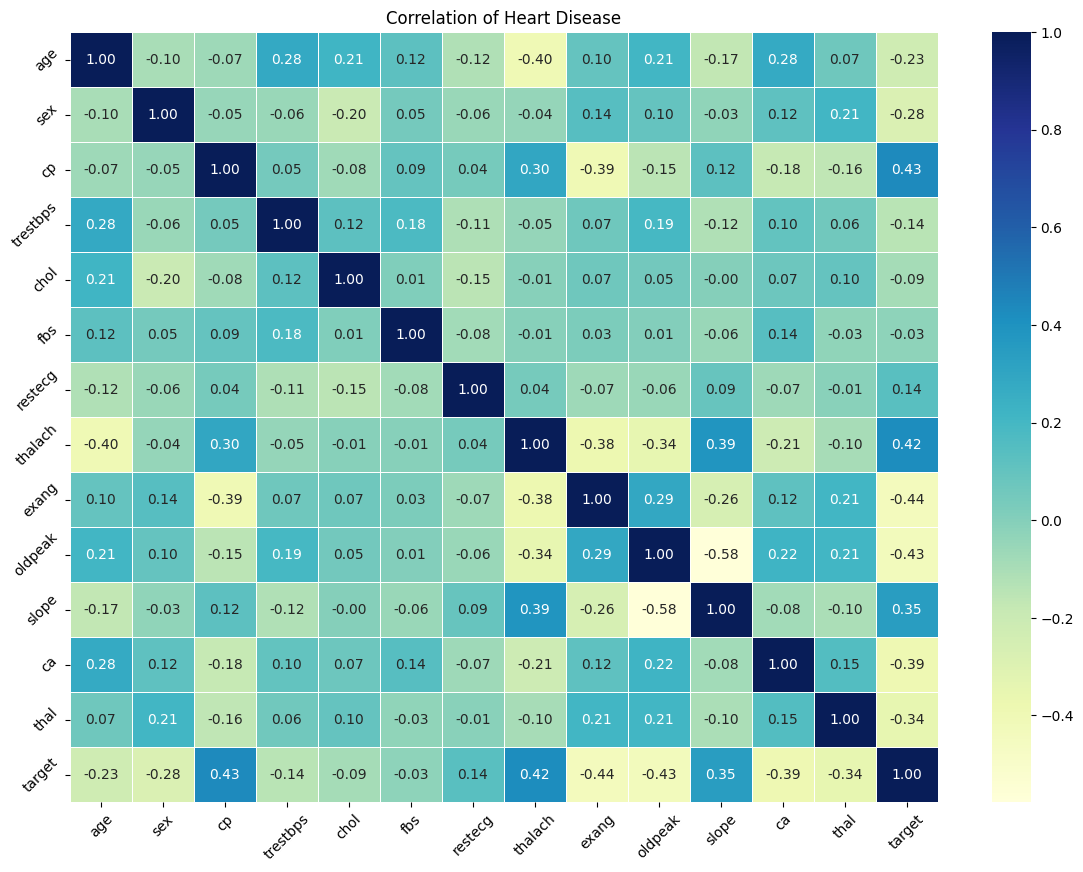

In [85]:
# Make the correlation matrix prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize= (14, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");
ax.tick_params(axis='x', labelrotation=45);
ax.tick_params(axis='y', labelrotation=45);

plt.title("Correlation of Heart Disease");

### 5. Modeling

In [86]:
# Devide the data into x and y
x = df.drop("target", axis = 1)

y = df["target"]

In [65]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [87]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [88]:
# split data into train and test set
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size= 0.2)

Now we're got out data split into train and test sets, it's time to build a mechine learning model.
- we'll train it (find the pattern) on the training split.
- we'll test it (use the pattern) on the testing split.

We're going to try 3 different Mechine Learning Models
1. Logistic Regression
2. K - Nearest Neighbors Classifier
3. Random Forest Classifier

In [98]:
# Put model in a dictionary
models = {"Logistic Regression": LogisticRegression(),
        "K-Neighbors Classifier":KNeighborsClassifier(),
        "Random Forest Classifier": RandomForestClassifier()}

# Create a Function to fit the Mechine learning model
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates the mechine learning models.
    models : a dictionary of different scikit-learn meachine learning models.
    x_train : training data (no labels)
    x_test : test data 
    y_train : training labels
    y_test : testing labels
    """
    
    # set Random seed
    np.random.seed(42)
    
    # Make a dictionarys to keep model scores 
    model_scores = {}
    
    # loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(x_train, y_train)
        # evaluate the model and append it score to the model_scores
        model_scores[name] = model.score(x_test, y_test)
    
    return model_scores;

In [99]:
model_scores = fit_and_score(models = models, 
                            x_train = x_train, 
                            x_test = x_test,
                            y_train = y_train, 
                            y_test = y_test)
model_scores

c:\Users\haaki\Documents\Campus\python\heart-disease-project\heart-disease-env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'K-Neighbors Classifier': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

#### Model Comparison

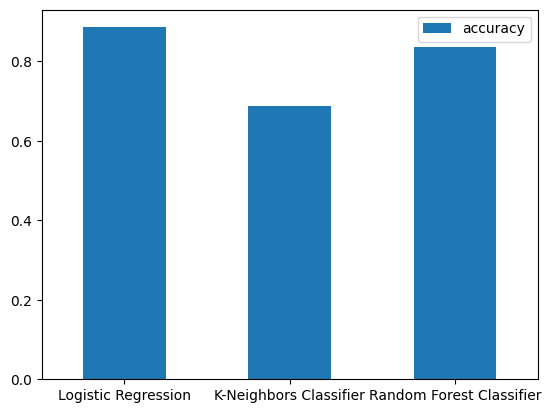

In [105]:
model_compre = pd.DataFrame(model_scores, index=["accuracy"])
model_compre.T.plot.bar()
plt.xticks(rotation = 0);

Now We're got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should Do?

Let's look at following:
* Hyperparameter Tuning 
* Feature importence 
* Confution matrix
* Cross valdation score
* Precision
* Recall Score 
* F1 Score 
* Classification Report
* ROC curve
* Area Under the curve (AUC)

**Hyperparameter Tuning**

In [106]:
# let's tune KNN
train_score = []
test_score = []

# create a list of different values for n_neighbors
neighbors = range(1, 21)

# setup KNN instence
knn = KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # fit the algorithm
    knn.fit(x_train, y_train)
    
    # Update the training scores list 
    train_score.append(knn.score(x_train, y_train))
    
    # update the test score list
    test_score.append(knn.score(x_test, y_test))

In [107]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [108]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41 %


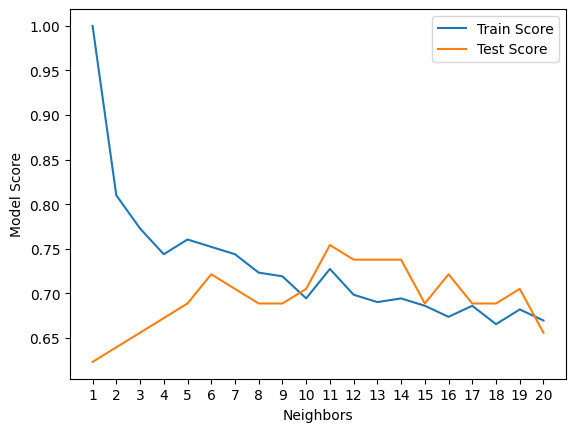

In [113]:
plt.plot(neighbors, train_score, label="Train Score")
plt.plot(neighbors, test_score, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Neighbors")
plt.ylabel("Model Score")
plt.legend()


print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f} %")

### HyperParameter Tuning Using RandomizedSearchCV
We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

....Using RandomizedSearchCV

In [139]:
# Create Hyperparamete grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create Hyperparamete grid for RandomForestClassifier
rf_grid = { "n_estimators": np.arange(10, 1000, 50),
            "max_depth" : [None, 3, 5, 10],
            "min_samples_split": np.arange(2, 20 ,2),
            "min_samples_leaf": np.arange(1, 20, 2)}

Tune them using RandomizedSearchCV

**LogisticRegression**

In [140]:
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions= log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [141]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [142]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

**RandomForestClassifier**

In [143]:
np.random.seed(42)

# setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV( RandomForestClassifier(),
                            param_distributions=rf_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True)

# fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [145]:
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [146]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(x_test, y_test)

0.8688524590163934

#### Hyperparameter Tuning with GridSearchCV
Since our LogisticRegression Model provides the best score so far, 
We'll try and improve them using GridSearchCV.

In [148]:
# Differen Hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                                param_grid= log_reg_grid,
                                cv=5,
                                verbose=True)

# fit random hyperparameter search model for LogisticRegression
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [151]:
# Check the best hyperparameters 
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [152]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(x_test, y_test)

0.8852459016393442

As a conclution we're sticking with LogisticRegression model 

#### Evaluating our tuned Mechine Learning Classifier, beyond accuracy...
- ROC Curve and  AUC score 
- Confution Metrix
- Clssification Report 
- Precision
- Recall
- F1 Score

... it would be great if cross-validation used where possible

In [154]:
# make predictions with tuned model 
y_preds = gs_log_reg.predict(x_test)

In [155]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

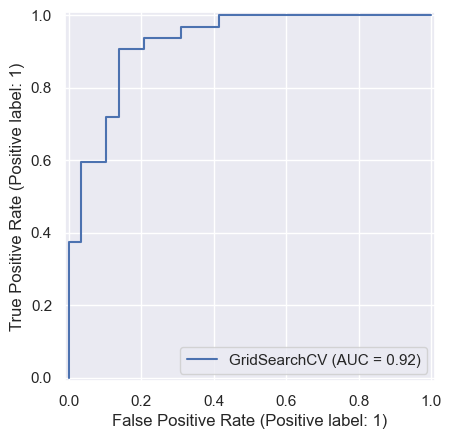

In [172]:
# plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test);

In [161]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


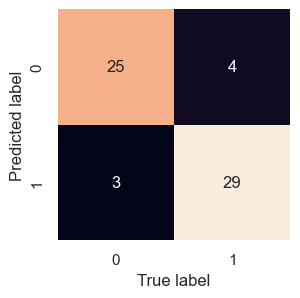

In [173]:
sns.set_theme(font_scale=1)

def plot_conf_mat(y_test, y_preds):
    """
    Plot a confution metrix using seaborn heatmap
    """
    
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(   confusion_matrix(y_test, y_preds),
                        annot=True,
                        cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds)

Get Classification Report, and Cross validated Precision, Recall and f1 score

In [174]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Claculate evaluation metrics using cross-validation
We're going to calculate accuracy, precision, recall, f1-score of our model using cross-vlidation and to do so we'll be using `cross_val_score()`.

In [175]:
# check the best hyperparameters 
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [177]:
# create a new classifier with best hyperparameters
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

In [180]:
# cross-validated accuracy
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8479781420765027)

In [185]:
# cross-validated precision
cv_precison = cross_val_score(  clf,
                                x,
                                y,
                                cv=5,
                                scoring="precision")
cv_precison = np.mean(cv_precison)
cv_precison

np.float64(0.8215873015873015)

In [ ]:
# cross-validated recall
cv_recall = cross_val_score(clf,
                            x,
                            y,
                            cv=5,
                            scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9272727272727274)

In [ ]:
# cross-validated f1-score
cv_f1 = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8705403543192143)

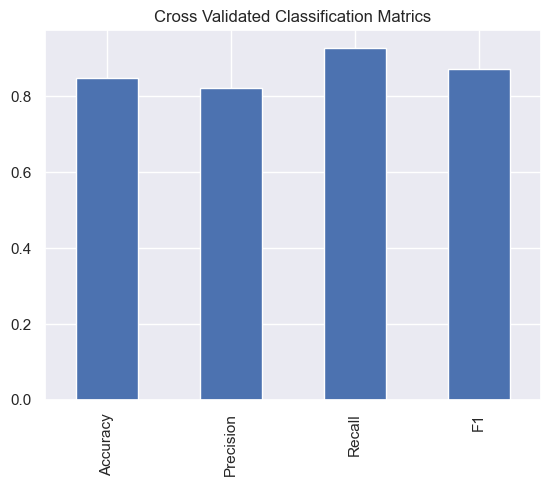

In [190]:
# visualize cross-validated score
cv_matrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precison,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                            index=[0])
cv_matrics.T.plot.bar(title="Cross Validated Classification Matrics",
                        legend=False);

##### Feature Importance
Which feature contributed modt to the outcomes of the model and how did they contribute?

Finding feature importance is different for each mechine learning models.

In [192]:
# fit an instence of LogisicRegression model 
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

clf.fit(x_train, y_train);

In [193]:
clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [194]:
# match coef's features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.0032076873709286024),
 'sex': np.float64(-0.8606204735539111),
 'cp': np.float64(0.6600143086174385),
 'trestbps': np.float64(-0.01155970641957489),
 'chol': np.float64(-0.0016649609500147373),
 'fbs': np.float64(0.04017238940156104),
 'restecg': np.float64(0.3160340177157746),
 'thalach': np.float64(0.02458922261936637),
 'exang': np.float64(-0.6047017032281077),
 'oldpeak': np.float64(-0.567954572983317),
 'slope': np.float64(0.4508539117301764),
 'ca': np.float64(-0.6373332602422034),
 'thal': np.float64(-0.6755508982355707)}

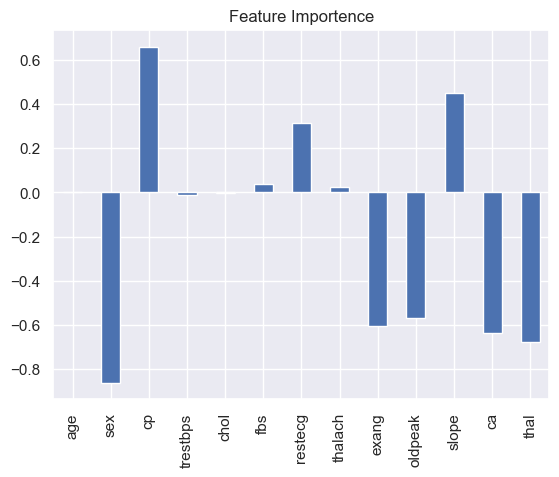

In [196]:
# visialize feature importence 
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title = "Feature Importence", legend=False);